In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Crop.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape

(2200, 8)

In [5]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [6]:
X = data.drop('label',axis=1)
y = data['label']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/4,shuffle=True)

In [8]:
print("Train : " ,X_train.shape)
print("Test  : " ,X_test.shape)

Train :  (1650, 7)
Test  :  (550, 7)


In [9]:
knn  = KNeighborsClassifier(n_neighbors=5)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.9836363636363636

In [13]:
knn.predict(X_test[:4])

array(['pigeonpeas', 'lentil', 'rice', 'banana'], dtype=object)

## Confusion Matrix

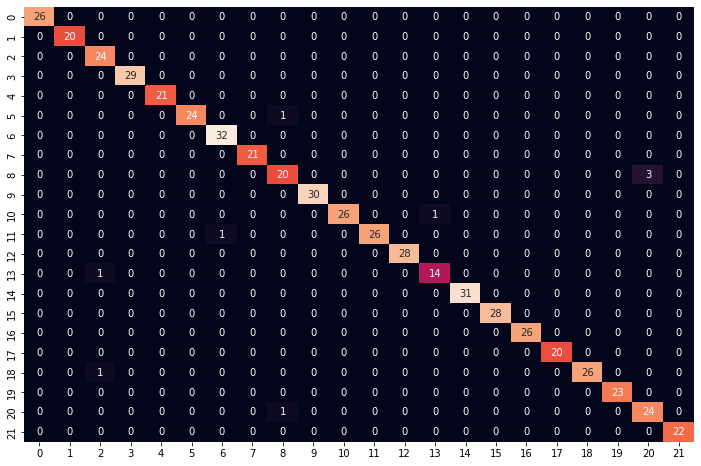

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)

## Optimal K value

Accuracy at k = 1 is 98.36
Accuracy at k = 2 is 98.0
Accuracy at k = 3 is 98.18
Accuracy at k = 4 is 98.72999999999999
Accuracy at k = 5 is 98.36
Accuracy at k = 6 is 98.91
Accuracy at k = 7 is 98.36
Accuracy at k = 8 is 98.91
Accuracy at k = 9 is 98.91
Accuracy at k = 10 is 98.72999999999999
Accuracy at k = 11 is 98.72999999999999
Accuracy at k = 12 is 98.36
Accuracy at k = 13 is 98.36
Accuracy at k = 14 is 98.18
Accuracy at k = 15 is 98.36
Accuracy at k = 16 is 98.18
Accuracy at k = 17 is 98.18
Accuracy at k = 18 is 97.82
Accuracy at k = 19 is 98.0

Minimum error:- 0.01090909090909091 at K = 6


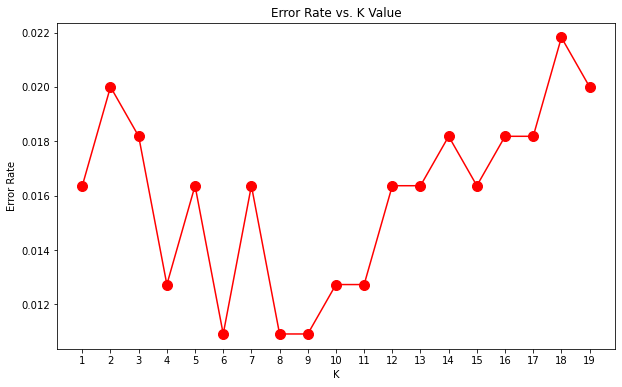

In [16]:
error_rate = []
for i in range(1, 20):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = np.round(accuracy_score(y_test, predictions),4)*100
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='red',marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1,20))
print("\nMinimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)